In [8]:
# @title INSTALAÇÃO DOS MÓDULOS NECESSÁRIOS

# Remver comentário das linhas abaixo, caso seja necessário instalar o Pandas
#!pip install pandas -q
#!pip install matplotlib -q


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
# @title IMPORTAÇÃO DAS BIBLIOTECAS

import sqlite3 as sq
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# @title CONEXÃO COM A BASE DE DADOS SQLITE

BASE = "datatran"
conn = sq.connect(f"{BASE}.db", check_same_thread=False)

In [11]:
# @title CONSULTA DOS NOMES DE ESTADOS

query = f"SELECT * FROM estados"
lista_estados = pd.read_sql(query, conn)['estado'].to_list()
lista_estados

['Acre',
 'Alagoas',
 'Amapá',
 'Amazonas',
 'Bahia',
 'Ceará',
 'Distrito Federal',
 'Espírito Santo',
 'Goiás',
 'Maranhão',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Pará',
 'Paraíba',
 'Paraná',
 'Pernambuco',
 'Piauí',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Rondônia',
 'Roraima',
 'Santa Catarina',
 'São Paulo',
 'Sergipe',
 'Tocantins']

In [25]:
# @title FUNÇÃO PARA GERAR GRÁFICOS
def gerarGraficos(query, conexao):
    df = pd.read_sql_query(query, con=conexao)
    df.columns = ['Mês','Acidentes','Mortos','Percentual']

    plt.figure(figsize=((30,8)))

    plt.xlabel('Mês')
    plt.ylabel('Ocorrências')

    col = 'Acidentes'
    plt.bar(df['Mês'],df[col],'y',linewidth=4.0)
    plt.grid()
    plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

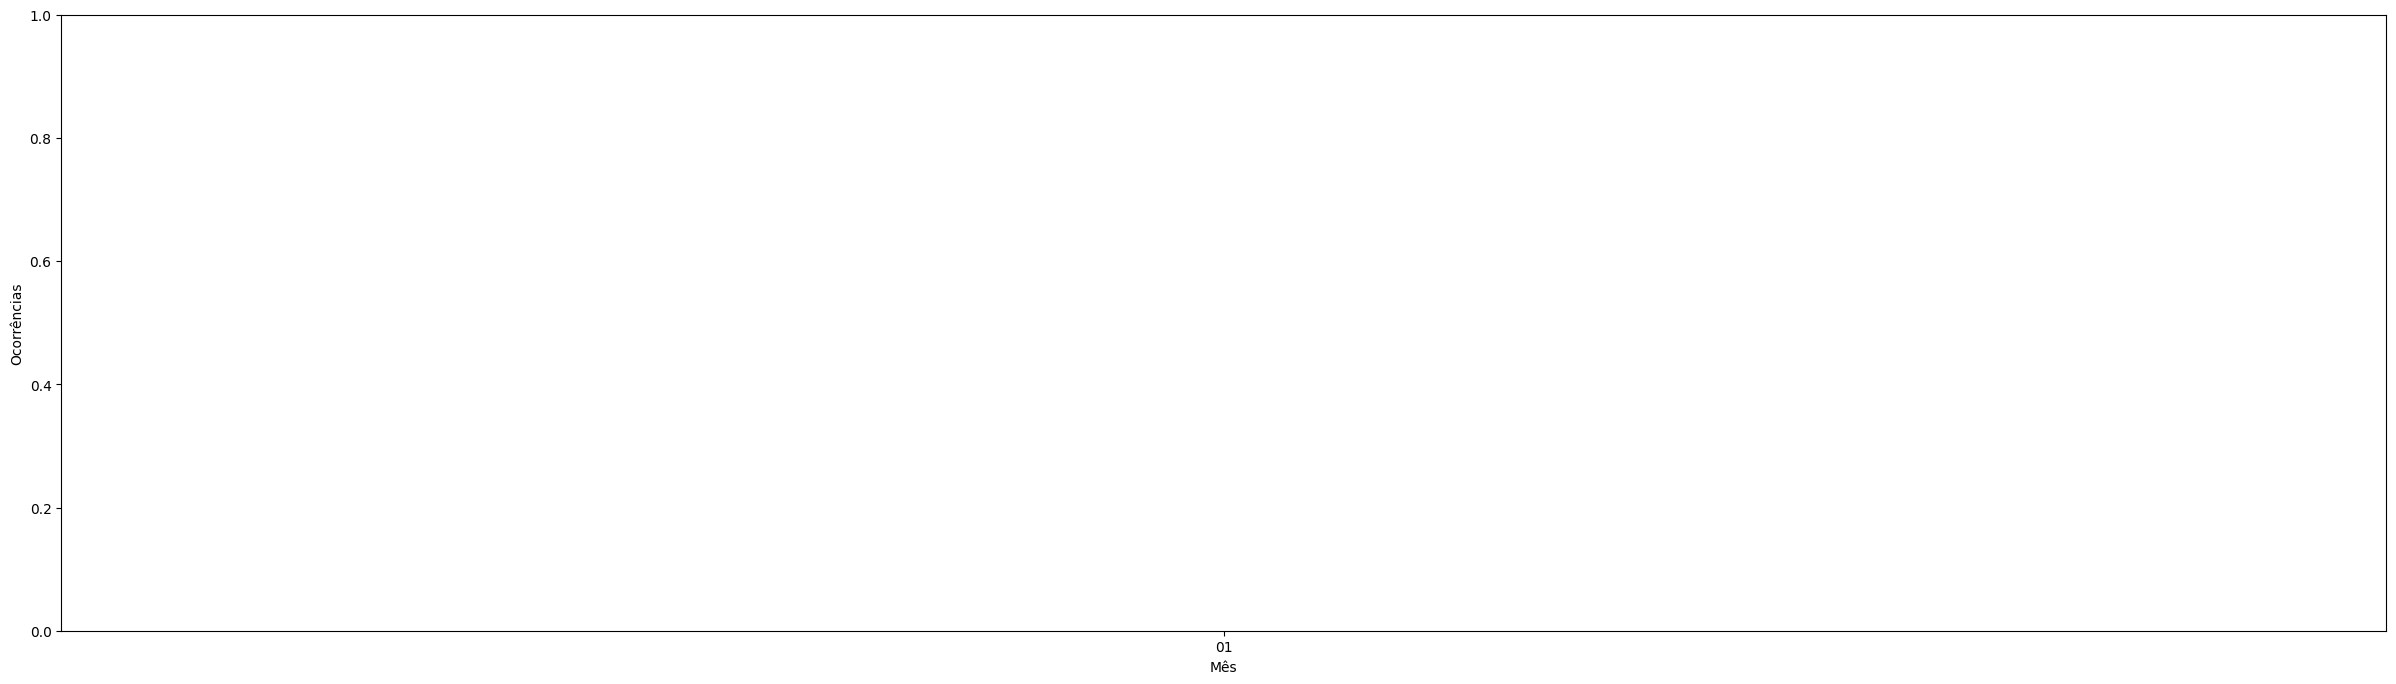

In [26]:
for estado in lista_estados:
    query = f"""
        SELECT
            strftime('%m', a.data_acidente) AS mes,
            COUNT(*),
            SUM(a.mortos),
            ROUND((SUM(a.mortos)*100.0/count(a.cod)),2) AS percentual
        FROM acidentes AS a
        INNER JOIN ocorrencias AS o
            ON a.cod = o.cod_acidente
        INNER JOIN estados AS e 
            ON e.cod = o.cod_estado
        WHERE e.estado = '{estado}'
        GROUP BY mes
        ORDER BY mes;
        """
    gerarGraficos(query, conn)